# Modifying the `Network` object
`GeNet` supports some simple modifications like adding, reindexing and removing nodes and links and some involved modifications like changing the data stored under nodes or links. All of these changes get recorded in `n.change_log`.

In [1]:
# read example network
import pandas as pd
from genet import Network
import os

n = Network('epsg:27700')
path_to_matsim_network = '../example_data/pt2matsim_network'
n.read_matsim_network(os.path.join(path_to_matsim_network, 'network.xml'))
n.read_matsim_schedule(os.path.join(path_to_matsim_network, 'schedule.xml'))
n

<Network instance at 4380136840: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 1662
Number of edges: 3166
Average in degree:   1.9049
Average out degree:   1.9049 and 
schedule Schedule:
Number of services: 9
Number of routes: 68
Number of stops: 45

## Adding nodes/links

In [2]:
n.add_link(link_id='proposed_index', u='4356572310', v='5811263955')

2021-02-12 11:47:09,766 - Added Link with index proposed_index, from node:4356572310 to node:5811263955, under multi-index:1, and data={'from': '4356572310', 'to': '5811263955', 'id': 'proposed_index'}


'proposed_index'

In [3]:
n.add_node(node='proposed_index', attribs={'data':'some_data'})

2021-02-12 11:47:09,783 - Added Node with index `proposed_index` and data={'data': 'some_data'}


'proposed_index'

The index passed is only a proposition. If a node or link under this link exists, a new, unique index will be generated.

In [4]:
actual_link_id_added = n.add_link(link_id='proposed_index', u='4356572310', v='5811263955')

2021-02-12 11:47:09,806 - Generated 1 link ids.
2021-02-12 11:47:09,807 - Generated link id 0.
2021-02-12 11:47:09,811 - `proposed_index` already exists. Generated a new unique_index: `0`
2021-02-12 11:47:09,821 - Added Link with index 0, from node:4356572310 to node:5811263955, under multi-index:2, and data={'from': '4356572310', 'to': '5811263955', 'id': '0'}


## Reindexing

To reindex a node or link:

In [5]:
n.reindex_node('proposed_index', 'another_index')

2021-02-12 11:47:09,906 - Changed Link attributes for 0 links
2021-02-12 11:47:09,954 - Changed Link attributes for 0 links
2021-02-12 11:47:09,965 - Changed Node attributes under index: proposed_index
2021-02-12 11:47:10,006 - Changed Node index from proposed_index to another_index


In [6]:
n.reindex_link('proposed_index', 'another_index')

2021-02-12 11:47:10,027 - Changed Link attributes under index: proposed_index
2021-02-12 11:47:10,028 - Changed Link index from proposed_index to another_index


## Removing nodes/links

To remove a link or node:

In [7]:
n.remove_links(['another_index', actual_link_id_added])

2021-02-12 11:47:10,040 - Removed 2 links


In [8]:
n.remove_node('another_index')

2021-02-12 11:47:10,058 - Removed Node under index: another_index


## Modifying data stored on nodes or edges:

Let's say you have extracted `genet.Network` link ids of interest (See Section on Using Network - Accessing Data) and now you want to make changes to the network. Let's make changes to the nested OSM data stored on the links. We will replace the highway tags from `'primary'` to `'SOMETHING'`.

In [9]:
from genet import graph_operations

links = n.extract_links_on_edge_attributes(
    conditions= {'attributes': {'osm:way:highway': {'text': 'primary'}}},
)

links[:5]

['1007', '1008', '1023', '1024', '103']

In [10]:
n.link(links[0])

{'id': '1007',
 'from': '4356572310',
 'to': '5811263955',
 'freespeed': 22.22222222222222,
 'capacity': 3000.0,
 'permlanes': 2.0,
 'oneway': '1',
 'modes': {'car'},
 's2_from': 5221390723045407809,
 's2_to': 5221390723040504387,
 'attributes': {'osm:way:highway': {'name': 'osm:way:highway',
   'class': 'java.lang.String',
   'text': 'primary'},
  'osm:way:id': {'name': 'osm:way:id',
   'class': 'java.lang.Long',
   'text': '589660342'},
  'osm:way:lanes': {'name': 'osm:way:lanes',
   'class': 'java.lang.String',
   'text': '2'},
  'osm:way:name': {'name': 'osm:way:name',
   'class': 'java.lang.String',
   'text': 'Shaftesbury Avenue'},
  'osm:way:oneway': {'name': 'osm:way:oneway',
   'class': 'java.lang.String',
   'text': 'yes'}},
 'length': 13.941905154249884}

We create a dictionary which maps same changes to all links in the list using:

```python
    {link_id: {'attributes': {'osm:way:highway': {'text': 'SOMETHING'}}} for link_id in links}
```

In [11]:
n.apply_attributes_to_links({link_id: {'attributes': {'osm:way:highway': {'text': 'SOMETHING'}}} for link_id in links})

2021-02-12 11:47:10,342 - Changed Link attributes for 619 links


In [12]:
n.link(links[0])

{'id': '1007',
 'from': '4356572310',
 'to': '5811263955',
 'freespeed': 22.22222222222222,
 'capacity': 3000.0,
 'permlanes': 2.0,
 'oneway': '1',
 'modes': {'car'},
 's2_from': 5221390723045407809,
 's2_to': 5221390723040504387,
 'attributes': {'osm:way:highway': {'name': 'osm:way:highway',
   'class': 'java.lang.String',
   'text': 'SOMETHING'},
  'osm:way:id': {'name': 'osm:way:id',
   'class': 'java.lang.Long',
   'text': '589660342'},
  'osm:way:lanes': {'name': 'osm:way:lanes',
   'class': 'java.lang.String',
   'text': '2'},
  'osm:way:name': {'name': 'osm:way:name',
   'class': 'java.lang.String',
   'text': 'Shaftesbury Avenue'},
  'osm:way:oneway': {'name': 'osm:way:oneway',
   'class': 'java.lang.String',
   'text': 'yes'}},
 'length': 13.941905154249884}

In [13]:
n.change_log.head()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
0,2021-02-12 11:47:09,add,link,None,proposed_index,None,"{'from': '4356572310', 'to': '5811263955', 'id...","[(add, , [('from', '4356572310'), ('to', '5811..."
1,2021-02-12 11:47:09,add,node,None,proposed_index,None,{'data': 'some_data'},"[(add, , [('data', 'some_data')]), (add, id, p..."
2,2021-02-12 11:47:09,add,link,None,0,None,"{'from': '4356572310', 'to': '5811263955', 'id...","[(add, , [('from', '4356572310'), ('to', '5811..."
3,2021-02-12 11:47:09,modify,node,proposed_index,another_index,{'data': 'some_data'},"{'data': 'some_data', 'id': 'another_index'}","[(add, , [('id', 'another_index')]), (change, ..."
4,2021-02-12 11:47:09,modify,node,proposed_index,proposed_index,{'data': 'some_data'},"{'data': 'some_data', 'id': 'another_index'}","[(add, , [('id', 'another_index')])]"


In [14]:
n.change_log.loc[618, :]['old_attributes']

"{'id': '959', 'from': '300501141', 'to': '294158420', 'freespeed': 22.22222222222222, 'capacity': 1500.0, 'permlanes': 1.0, 'oneway': '1', 'modes': {'car'}, 's2_from': 5221390337863745429, 's2_to': 5221390337351379383, 'attributes': {'osm:relation:route': {'name': 'osm:relation:route', 'class': 'java.lang.String', 'text': 'bus'}, 'osm:way:highway': {'name': 'osm:way:highway', 'class': 'java.lang.String', 'text': 'primary'}, 'osm:way:id': {'name': 'osm:way:id', 'class': 'java.lang.Long', 'text': '26785612'}, 'osm:way:name': {'name': 'osm:way:name', 'class': 'java.lang.String', 'text': 'Albany Street'}}, 'length': 90.65828423645875}"

In [15]:
n.change_log.loc[618, :]['new_attributes']

"{'id': '959', 'from': '300501141', 'to': '294158420', 'freespeed': 22.22222222222222, 'capacity': 1500.0, 'permlanes': 1.0, 'oneway': '1', 'modes': {'car'}, 's2_from': 5221390337863745429, 's2_to': 5221390337351379383, 'attributes': {'osm:relation:route': {'name': 'osm:relation:route', 'class': 'java.lang.String', 'text': 'bus'}, 'osm:way:highway': {'name': 'osm:way:highway', 'class': 'java.lang.String', 'text': 'SOMETHING'}, 'osm:way:id': {'name': 'osm:way:id', 'class': 'java.lang.Long', 'text': '26785612'}, 'osm:way:name': {'name': 'osm:way:name', 'class': 'java.lang.String', 'text': 'Albany Street'}}, 'length': 90.65828423645875}"

In [16]:
n.change_log.loc[618, :]['diff']

[('change', 'attributes.osm:way:highway.text', ('primary', 'SOMETHING'))]

Another useful method is the `apply_function_to_links`/`nodes`. This function takes a user-defined function with the variable that is the data dictionary stored on the links or nodes respectively. This function does not support `conditions`, but this is something that can be encoded in you function, for example:

In [17]:
def divide_capacity(link_attributes):
    if 'car' in link_attributes['modes']:
        return link_attributes['capacity']/link_attributes['permlanes']
    
n.apply_function_to_links(divide_capacity, 'base_capacity')

2021-02-12 11:47:11,394 - Changed Link attributes for 3166 links


This method will apply results of this function to links for which a value can be computed. For use here, that means that for any link which has a `'car'` value in `'modes'` a value of capacity divided by the number of lanes will be computed. We specify that the results will be stored under `base_capacity` in the links attribute dictionary.

In [18]:
n.link(links[0])

{'id': '1007',
 'from': '4356572310',
 'to': '5811263955',
 'freespeed': 22.22222222222222,
 'capacity': 3000.0,
 'permlanes': 2.0,
 'oneway': '1',
 'modes': {'car'},
 's2_from': 5221390723045407809,
 's2_to': 5221390723040504387,
 'attributes': {'osm:way:highway': {'name': 'osm:way:highway',
   'class': 'java.lang.String',
   'text': 'SOMETHING'},
  'osm:way:id': {'name': 'osm:way:id',
   'class': 'java.lang.Long',
   'text': '589660342'},
  'osm:way:lanes': {'name': 'osm:way:lanes',
   'class': 'java.lang.String',
   'text': '2'},
  'osm:way:name': {'name': 'osm:way:name',
   'class': 'java.lang.String',
   'text': 'Shaftesbury Avenue'},
  'osm:way:oneway': {'name': 'osm:way:oneway',
   'class': 'java.lang.String',
   'text': 'yes'}},
 'length': 13.941905154249884,
 'base_capacity': 1500.0}

# Modifying the `Schedule` object

GeNet has a number of methods to change the Schedule objects. Make sure you validate the end result.

In [19]:
from genet import Stop, Route, Service

## Adding Routes, Services

You can add `Route`s and `Service`s. To add a `Route`, you need to identify which existing `Service` it should come under.

In [20]:
n.schedule.route('VJ375a660d47a2aa570aa20a8568012da8497ffecf').__dict__

{'route_short_name': 'N55',
 'mode': 'bus',
 'trips': {'VJ2cdccea96e0e3e6a53a968bcb132941415d6d7c9_04:53:00': '04:53:00',
  'VJ375a660d47a2aa570aa20a8568012da8497ffecf_03:53:00': '03:53:00',
  'VJ3b9d77d2ef200b21c8048fea5eedc2d2788a1b94_01:54:00': '01:54:00',
  'VJ79974c386a39426e06783650a759828438432aa4_05:23:00': '05:23:00',
  'VJa09c394b71031216571d813a6266c83f2d30bf0a_04:23:00': '04:23:00',
  'VJb1ecf6f30844187f7b9364fd9550acdcc5ce2c22_01:25:00': '01:25:00',
  'VJc22488e687bcce9c50e372806cd8a1bcdddd5f98_02:24:00': '02:24:00',
  'VJc3fd8f2be7eb005d47a13119c129d23ba6fed5fd_03:23:00': '03:23:00',
  'VJe80a8ff48d21b29919ca3d8234d5a86bbf729513_02:54:00': '02:54:00',
  'VJe81073fff46cfb30ff47a53f387e05dc17f2dda3_24:55:00': '24:55:00'},
 'arrival_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'],
 'departure_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'],
 'route_long_name': '',
 'id': 'VJ375a660d47a2aa570aa20a8568012da8497ffecf',
 'route': ['834', '1573', '3139', '31

In [21]:
route = Route(
    route_short_name='N55',
    mode='bus',
    trips={'VJ2cdccea96e0e3e6a53a968bcb132941415d6d7c9_04:53:00': '04:53:00',
      'VJ375a660d47a2aa570aa20a8568012da8497ffecf_03:53:00': '03:53:00',
      'VJ3b9d77d2ef200b21c8048fea5eedc2d2788a1b94_01:54:00': '01:54:00',
      'VJ79974c386a39426e06783650a759828438432aa4_05:23:00': '05:23:00',
      'VJa09c394b71031216571d813a6266c83f2d30bf0a_04:23:00': '04:23:00',
      'VJb1ecf6f30844187f7b9364fd9550acdcc5ce2c22_01:25:00': '01:25:00',
      'VJc22488e687bcce9c50e372806cd8a1bcdddd5f98_02:24:00': '02:24:00',
      'VJc3fd8f2be7eb005d47a13119c129d23ba6fed5fd_03:23:00': '03:23:00',
      'VJe80a8ff48d21b29919ca3d8234d5a86bbf729513_02:54:00': '02:54:00',
      'VJe81073fff46cfb30ff47a53f387e05dc17f2dda3_24:55:00': '24:55:00'},
   arrival_offsets=['00:00:00', '00:02:00', '00:04:00', '00:06:00'],
   departure_offsets=['00:00:00', '00:02:00', '00:04:00', '00:06:00'],
   id='new_route',
#    route= ['834', '1573', '3139', '3141', '574', '3154', '979', '980', '981'],
   await_departure= [True, True],
   stops=[
       Stop(id='490000235X.link:834', x=529981.7958802709, y=181412.0975758662,
            name='Tottenham Court Road Station (Stop X)',
            additional_attributes=['linkRefId', 'isBlocking'],
            linkRefId='834', isBlocking='false', epsg='epsg:27700'),
       Stop(id='new_stop', x=529500, y=181300,
            name='New Stop', epsg='epsg:27700'),
       Stop(id='490010689KB.link:981', x=529166.7349732723, y=181256.33672284335,
            name='Great Titchfield Street  Oxford Circus Station (Stop OP)',
            additional_attributes=['linkRefId', 'isBlocking'],
            linkRefId='981', isBlocking='false', epsg='epsg:27700')
   ]
)

n.schedule.add_route('20274', route)

2021-02-12 11:47:12,893 - Added Route with index `new_route`, data={'route_short_name': 'N55', 'mode': 'bus', 'trips': {'VJ2cdccea96e0e3e6a53a968bcb132941415d6d7c9_04:53:00': '04:53:00', 'VJ375a660d47a2aa570aa20a8568012da8497ffecf_03:53:00': '03:53:00', 'VJ3b9d77d2ef200b21c8048fea5eedc2d2788a1b94_01:54:00': '01:54:00', 'VJ79974c386a39426e06783650a759828438432aa4_05:23:00': '05:23:00', 'VJa09c394b71031216571d813a6266c83f2d30bf0a_04:23:00': '04:23:00', 'VJb1ecf6f30844187f7b9364fd9550acdcc5ce2c22_01:25:00': '01:25:00', 'VJc22488e687bcce9c50e372806cd8a1bcdddd5f98_02:24:00': '02:24:00', 'VJc3fd8f2be7eb005d47a13119c129d23ba6fed5fd_03:23:00': '03:23:00', 'VJe80a8ff48d21b29919ca3d8234d5a86bbf729513_02:54:00': '02:54:00', 'VJe81073fff46cfb30ff47a53f387e05dc17f2dda3_24:55:00': '24:55:00'}, 'arrival_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'], 'departure_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'], 'route_long_name': '', 'id': 'new_route', 'route': [], 'await_departu

<Route instance at 4633395944: with 3 stops and 10 trips>

In [22]:
n.schedule.add_service(Service(id='new_service', routes=[route]))

2021-02-12 11:47:13,027 - Route with ID `new_route` within this Service `new_service` already exists in the Schedule. This Route will be reindexed to `new_service_new_route`
2021-02-12 11:47:13,097 - Reindexed Route from new_route to new_service_new_route
2021-02-12 11:47:13,125 - Added Service with index `new_service`, data={'id': 'new_service', 'name': 'N55'} and Routes: ['new_service_new_route']


<Service instance at 4633337304: with 1 routes>

In [23]:
n.schedule.change_log().head()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
0,2021-02-12 11:47:12,add,route,None,new_route,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","[(add, , [('route_short_name', 'N55'), ('mode'..."
1,2021-02-12 11:47:13,add,service,None,new_service,None,"{'id': 'new_service', 'name': 'N55'}","[(add, , [('id', 'new_service'), ('name', 'N55..."


There are no methods to add `Stop` objects on their own. They are added to the Schedule with `Route` and `Service` objects.

## Reindexing

In [24]:
n.schedule['new_service'].reindex(new_id='more_appropriate_id')

2021-02-12 11:47:13,236 - Reindexed Service from new_service to more_appropriate_id


In [25]:
n.schedule.route('new_route').reindex(new_id='more_appropriate_route_id')

2021-02-12 11:47:13,253 - Reindexed Route from new_route to more_appropriate_route_id


In [26]:
n.schedule.change_log().head()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
0,2021-02-12 11:47:12,add,route,None,new_route,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","[(add, , [('route_short_name', 'N55'), ('mode'..."
1,2021-02-12 11:47:13,add,service,None,new_service,None,"{'id': 'new_service', 'name': 'N55'}","[(add, , [('id', 'new_service'), ('name', 'N55..."
2,2021-02-12 11:47:13,modify,service,new_service,more_appropriate_id,{'id': 'new_service'},{'id': 'more_appropriate_id'},"[(change, id, (new_service, more_appropriate_i..."
3,2021-02-12 11:47:13,modify,route,new_route,more_appropriate_route_id,{'id': 'new_route'},{'id': 'more_appropriate_route_id'},"[(change, id, (new_route, more_appropriate_rou..."


## Removing Stops, Routes, Services

In [27]:
n.schedule.remove_service('more_appropriate_id')

2021-02-12 11:47:13,294 - Removed Service with index `more_appropriate_id`, data={'id': 'more_appropriate_id', 'name': 'N55'} and Routes: {'new_service_new_route'}


In [28]:
n.schedule.remove_route('more_appropriate_route_id')

2021-02-12 11:47:13,311 - Removed Route with index `more_appropriate_route_id`, data={'route_short_name': 'N55', 'mode': 'bus', 'trips': {'VJ2cdccea96e0e3e6a53a968bcb132941415d6d7c9_04:53:00': '04:53:00', 'VJ375a660d47a2aa570aa20a8568012da8497ffecf_03:53:00': '03:53:00', 'VJ3b9d77d2ef200b21c8048fea5eedc2d2788a1b94_01:54:00': '01:54:00', 'VJ79974c386a39426e06783650a759828438432aa4_05:23:00': '05:23:00', 'VJa09c394b71031216571d813a6266c83f2d30bf0a_04:23:00': '04:23:00', 'VJb1ecf6f30844187f7b9364fd9550acdcc5ce2c22_01:25:00': '01:25:00', 'VJc22488e687bcce9c50e372806cd8a1bcdddd5f98_02:24:00': '02:24:00', 'VJc3fd8f2be7eb005d47a13119c129d23ba6fed5fd_03:23:00': '03:23:00', 'VJe80a8ff48d21b29919ca3d8234d5a86bbf729513_02:54:00': '02:54:00', 'VJe81073fff46cfb30ff47a53f387e05dc17f2dda3_24:55:00': '24:55:00'}, 'arrival_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'], 'departure_offsets': ['00:00:00', '00:02:00', '00:04:00', '00:06:00'], 'route_long_name': '', 'id': 'more_appropriate_rout

In [29]:
n.schedule.change_log().head()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
0,2021-02-12 11:47:12,add,route,None,new_route,None,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","[(add, , [('route_short_name', 'N55'), ('mode'..."
1,2021-02-12 11:47:13,add,service,None,new_service,None,"{'id': 'new_service', 'name': 'N55'}","[(add, , [('id', 'new_service'), ('name', 'N55..."
2,2021-02-12 11:47:13,modify,service,new_service,more_appropriate_id,{'id': 'new_service'},{'id': 'more_appropriate_id'},"[(change, id, (new_service, more_appropriate_i..."
3,2021-02-12 11:47:13,modify,route,new_route,more_appropriate_route_id,{'id': 'new_route'},{'id': 'more_appropriate_route_id'},"[(change, id, (new_route, more_appropriate_rou..."
4,2021-02-12 11:47:13,remove,service,more_appropriate_id,None,"{'id': 'more_appropriate_id', 'name': 'N55'}",None,"[(remove, , [('id', 'more_appropriate_id'), ('..."


You can also remove `Stop`s. This will disconnect `Route`s and `Service`s using that `Stop`s and likely render them invalid. The method will warn you which `Route`s and `Servce`s are affected.

In [30]:
n.schedule.remove_stop('490000091H.link:1912')

2021-02-12 11:47:13,413 - Removed Stop with index `490000091H.link:1912`, data={'id': '490000091H.link:1912', 'x': 528934.7945010976, 'y': 182202.18554864498, 'epsg': 'epsg:27700', 'name': 'Great Portland Street (Stop H)', 'lat': 51.52402503323941, 'lon': -0.14288798709207978, 's2_id': 5221390331888332895, 'additional_attributes': ['linkRefId', 'name', 'isBlocking'], 'linkRefId': '1912', 'isBlocking': 'false'}. Routes affected: ['VJ0f3c08222de16c2e278be0a1bf0f9ea47370774e', 'VJef7f20c3a9bf1419f6401e1e9131fe2c634bcb9a', 'VJ948e8caa0f08b9c6bf6330927893942c474b5100', 'VJ235c8fca539cf931b3c673f9b056606384aff950', 'VJ95b4c534d7c903d76ec0340025aa88b81dba3ce4', 'VJ8f9aea7491080b0137d3092706f53dc11f7dba45']. Services affected: ['12430'].


Likewise, removing `Route`s and `Service`s is likely to result in a number of unused stops. There is a method to remove such stops.

In [31]:
n.schedule.remove_unsused_stops()

2021-02-12 11:47:13,427 - Removed Stop with index `new_stop`, data={'id': 'new_stop', 'x': 529500.0, 'y': 181300.0, 'epsg': 'epsg:27700', 'name': 'New Stop', 'lat': 51.51578819710296, 'lon': -0.1350768098744082, 's2_id': 5221390696585158415, 'additional_attributes': []}. Routes affected: []. Services affected: [].
2021-02-12 11:47:13,429 - Removed Stops with indecies `['new_stop']` which were not used by any Routes.


## Modifying data stored for Stops, Routes, Services

### Applying known or pre-computed changes
Applying changes or new attributes to Services, Routes and Stops can be done via Schedule level methods. They all work with a dictionary where the keys are the object IDs and the values are dictionaries holding attribute names and values. The method to extract a DataFrame on attributes comes in handy here. E.g.

In [32]:
df = n.schedule.service_attribute_data(keys='name')
df.head()

,name
17732,N20
14073,94
14134,98
15234,134
18915,N5


DataFrames are easy to work with. Youcould for exmaple manipulate the names or use other data to change these. For demonstration here, let's just set the names to something easy.

In [33]:
df['name'] = df['name'].apply(lambda x: f'Service_{x}')
df.head()

,name
17732,Service_N20
14073,Service_94
14134,Service_98
15234,Service_134
18915,Service_N5


You can then convert this to a dictionary and pass it to the `apply_attributes_to_services` method.

In [34]:
n.schedule.apply_attributes_to_services(df.T.to_dict())

2021-02-12 11:47:13,502 - Changed Service attributes for 9 services


In [35]:
n.schedule.change_log().tail()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
12,2021-02-12 11:47:13,modify,service,18915,18915,"{'id': '18915', 'name': 'N5'}","{'id': '18915', 'name': 'Service_N5'}","[(change, name, (N5, Service_N5))]"
13,2021-02-12 11:47:13,modify,service,18853,18853,"{'id': '18853', 'name': 'N8'}","{'id': '18853', 'name': 'Service_N8'}","[(change, name, (N8, Service_N8))]"
14,2021-02-12 11:47:13,modify,service,20274,20274,"{'id': '20274', 'name': 'N55'}","{'id': '20274', 'name': 'Service_N55'}","[(change, name, (N55, Service_N55))]"
15,2021-02-12 11:47:13,modify,service,15660,15660,"{'id': '15660', 'name': '113'}","{'id': '15660', 'name': 'Service_113'}","[(change, name, (113, Service_113))]"
16,2021-02-12 11:47:13,modify,service,12430,12430,"{'id': '12430', 'name': '205'}","{'id': '12430', 'name': 'Service_205'}","[(change, name, (205, Service_205))]"


You can do the same for `Routes` and `Stops`. Your dictionaries cannot however hold changes to indices. You will encounter an error and should use `reindex` methods for such operations.

In [36]:
n.schedule.apply_attributes_to_routes(
    {'VJ375a660d47a2aa570aa20a8568012da8497ffecf': {
        'name': 'my_favourite_route', 
        'mode': 'piggyback'
    }}
)

2021-02-12 11:47:13,610 - Changed Route attributes for 1 routes


In [37]:
n.schedule.apply_attributes_to_stops(
    {'490000235YB.link:574': {'new_attribute': 'hello!'}}
)

2021-02-12 11:47:13,621 - Changed Stop attributes for 1 stops


In [38]:
n.schedule.change_log().tail()

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
14,2021-02-12 11:47:13,modify,service,20274,20274,"{'id': '20274', 'name': 'N55'}","{'id': '20274', 'name': 'Service_N55'}","[(change, name, (N55, Service_N55))]"
15,2021-02-12 11:47:13,modify,service,15660,15660,"{'id': '15660', 'name': '113'}","{'id': '15660', 'name': 'Service_113'}","[(change, name, (113, Service_113))]"
16,2021-02-12 11:47:13,modify,service,12430,12430,"{'id': '12430', 'name': '205'}","{'id': '12430', 'name': 'Service_205'}","[(change, name, (205, Service_205))]"
17,2021-02-12 11:47:13,modify,route,VJ375a660d47a2aa570aa20a8568012da8497ffecf,VJ375a660d47a2aa570aa20a8568012da8497ffecf,"{'route_short_name': 'N55', 'mode': 'bus', 'tr...","{'route_short_name': 'N55', 'mode': 'piggyback...","[(change, mode, (bus, piggyback)), (add, , [('..."
18,2021-02-12 11:47:13,modify,stop,490000235YB.link:574,490000235YB.link:574,"{'services': ['18853', '20274', '14134'], 'rou...","{'services': ['18853', '20274', '14134'], 'rou...","[(add, , [('new_attribute', 'hello!')])]"


### Applying changes using functions or mappings

If you have some logic that can be written into a function of object's attributes, you can pass this to `apply_function_to_x` methods. You need to select `location`, which refers to the name of the attribute the result should be stored under. It can already exist and be overwritten. The function passed, is not expected to work with all objects. It will fail silently, only evaluating and generating outputs where possible.

In [39]:
from shapely.geometry import Point
def add_shapely_geometry_points(stop_attribs):
    return Point(stop_attribs['x'], stop_attribs['y'])
n.schedule.apply_function_to_stops(add_shapely_geometry_points, location='geometry')

2021-02-12 11:47:13,677 - Changed Stop attributes for 44 stops


In [40]:
n.schedule.change_log().tail(2)

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
61,2021-02-12 11:47:13,modify,stop,490004695A.link:3017,490004695A.link:3017,"{'services': ['18915', '17732'], 'routes': ['V...","{'services': ['18915', '17732'], 'routes': ['V...","[(add, , [('geometry', <shapely.geometry.point..."
62,2021-02-12 11:47:13,modify,stop,490000173RG.link:2614,490000173RG.link:2614,"{'services': ['14073'], 'routes': ['VJ6cf76a4c...","{'services': ['14073'], 'routes': ['VJ6cf76a4c...","[(add, , [('geometry', <shapely.geometry.point..."


In [41]:
n.schedule.stop_attribute_data(keys=['name', 'x', 'y', 'geometry']).head()

,name,x,y,geometry
490000235X.link:834,Tottenham Court Road Station (Stop X),529981.795880,181412.097576,POINT (529981.7958802709 181412.0975758662)
490000235YB.link:574,Oxford Street Soho Street (Stop YB),529570.781323,181336.281593,POINT (529570.7813227688 181336.2815925331)
490014214HE.link:3154,Wardour Street (Stop OM),529477.750156,181314.437043,POINT (529477.7501560802 181314.4370430721)
490010689KB.link:981,Great Titchfield Street Oxford Circus Station...,529166.734973,181256.336723,POINT (529166.7349732723 181256.3367228433)
490015196OG.link:2954,Holles Street (Stop OG),528823.776634,181291.362193,POINT (528823.776634044 181291.3621925522)


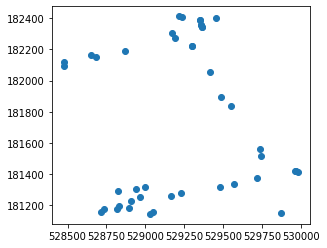

In [42]:
from geopandas import GeoDataFrame
GeoDataFrame(n.schedule.stop_attribute_data(keys='geometry')).plot()

In [43]:
n.schedule.stop('490000235YB.link:574').__dict__

{'id': '490000235YB.link:574',
 'x': 529570.7813227688,
 'y': 181336.2815925331,
 'epsg': 'epsg:27700',
 'name': 'Oxford Street  Soho Street (Stop YB)',
 'lat': 51.51609803324078,
 'lon': -0.13404398709291862,
 's2_id': 5221390696959560815,
 'additional_attributes': ['services',
  'routes',
  'linkRefId',
  'isBlocking',
  'new_attribute',
  'geometry'],
 'services': ['18853', '20274', '14134'],
 'routes': ['VJ375a660d47a2aa570aa20a8568012da8497ffecf',
  'VJdf3936da1a51eb33db594ef99738802c14b19995',
  'VJd78967364a302cf232c5139d40622dcb6c238c9e',
  'VJf9a22035ae6f25bb420df833474943ad76065c89',
  'VJ4e2b897edf0e7b8a8e3b5516ab43ce56f72c5cff',
  'VJ256e98df611ff48afe737ddc81cbcde82e4e81c8',
  'VJa7f37392e276aeac26c7e73bbc05e6a71af38dba',
  'VJ12ba6089dfb2733e29c415a1a0015fef30fd5305',
  'VJ2aba67e3ed98f2ed5f5966c1ac394cbf6d1943d7',
  'VJf3e316e5e605bb512147dee2a989be5a82ef1b5f'],
 'linkRefId': '574',
 'isBlocking': 'false',
 'new_attribute': 'hello!',
 'geometry': <shapely.geometry.point.

In [44]:


n.schedule.apply_function_to_routes()

TypeError: apply_function_to_routes() missing 2 required positional arguments: 'function' and 'location'

In [ ]:
n.schedule.apply_function_to_services()

In [ ]:
n.schedule.change_log().head()